In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft,fftfreq
from scipy import signal

Designing a Butterworth filter

In [10]:
def butter_bandpass(lowcut, highcut, fs, order=10):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def plot_fft(y,fs):
    N=len(y)
    T = 1/fs
    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]
    plt.figure(figsize=(14,4))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    return

In [11]:

def analyze(str_filename,Clean_space):

    df_0 = pd.read_csv(Clean_space)
    df = pd.read_csv(str_filename)
    fs = 62500.0
    T = 1/fs
    N= df.shape[0]
    y = np.array(df.Audio) - np.array(df_0.Audio)
    t = np.arange(0,N)*T


    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]

    #Band Pass filtering
    
    lowcut = 15000.0
    highcut = 20000.0

    b, a = butter_bandpass(lowcut, highcut, fs, order=12)
    w, h = signal.freqz(b, a, worN=30000)

    y_filtered_sound = butter_bandpass_filter(y, lowcut, highcut, fs, order=12)

    yf_filtered = fft(y_filtered_sound)
    xf_filtered = fftfreq(N, T)[:N//2]

    # Plot the frequency response and waveforms
    fig,ax = plt.subplots(4,1, figsize=(16,16))
    ax[0].plot(t, y)
    ax[0].title.set_text('Recieved Echo')

    ax[1].plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    ax[1].title.set_text('FFT of the Recieved Echo')

    ax[2].plot(t, y_filtered_sound)
    ax[2].title.set_text('BandPass filtered Recieved Echo')

    ax[3].plot(xf_filtered, 2.0/N * np.abs(yf_filtered[0:N//2]))
    ax[3].title.set_text('FFT of BP-Recieved Echo')

    plt.show()


### Apply a Band Pass Butterworth filter

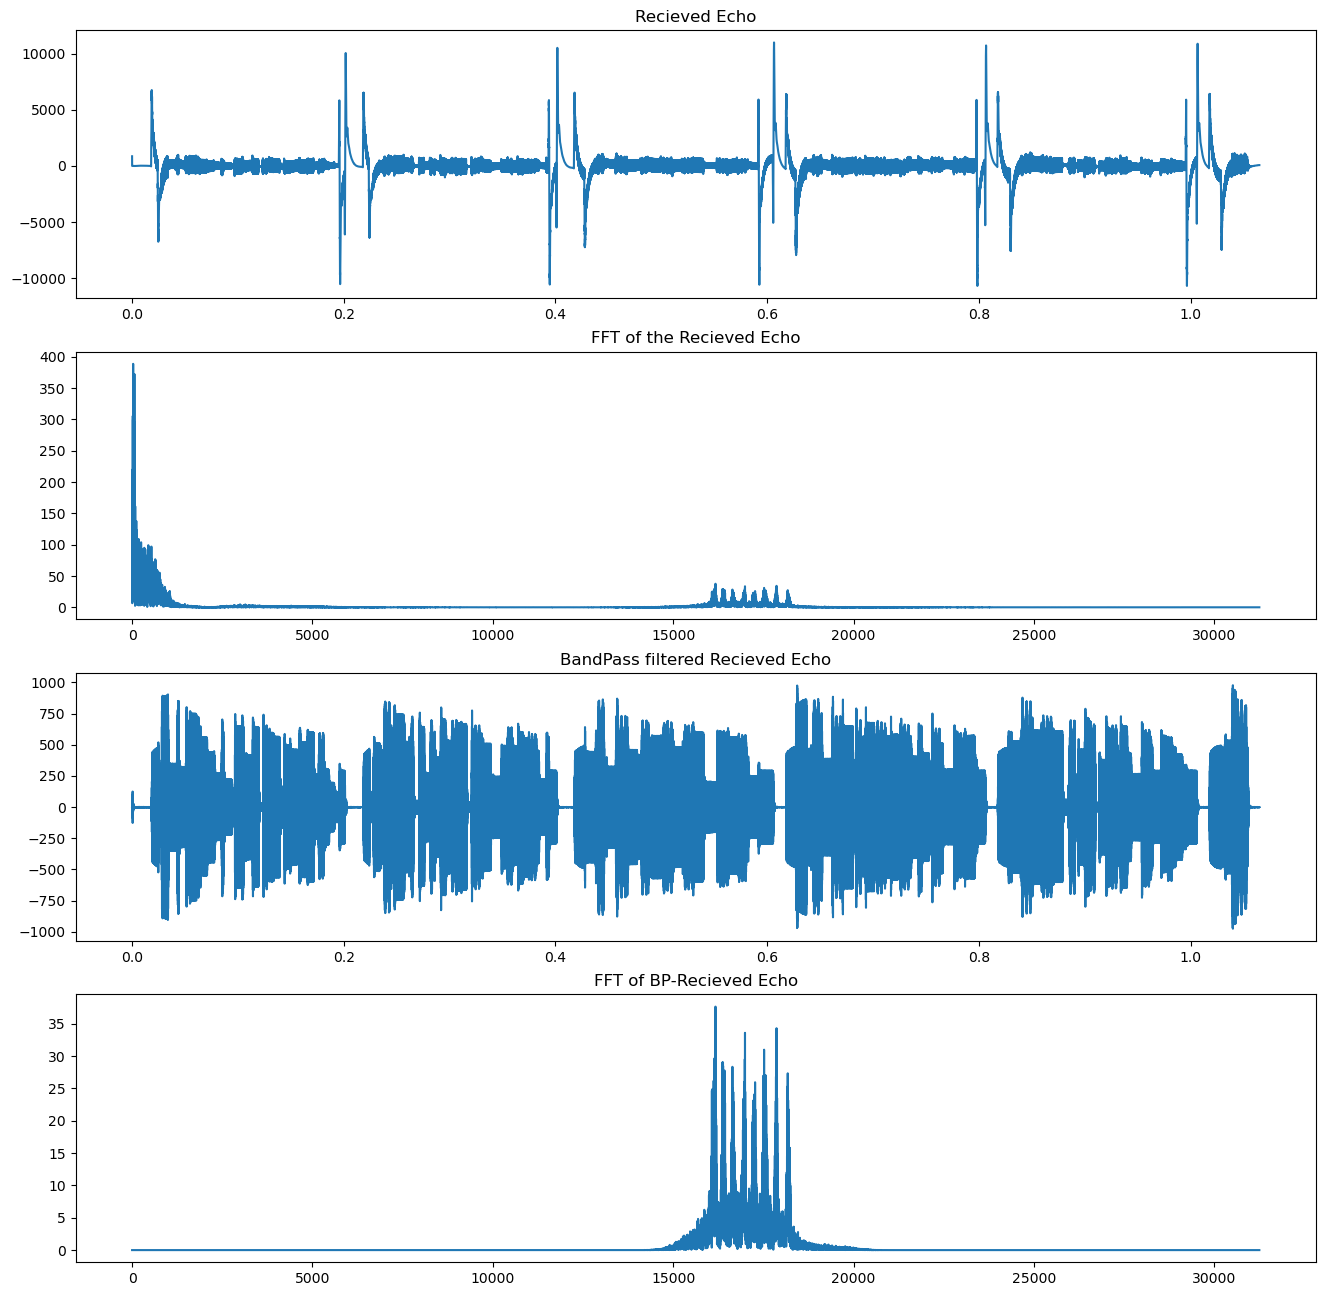

In [12]:
Clean_space = "data\Measurement_0.csv"
str_filename = "data\Measurement_3.csv"   
analyze(str_filename,Clean_space)  


Data series analysing

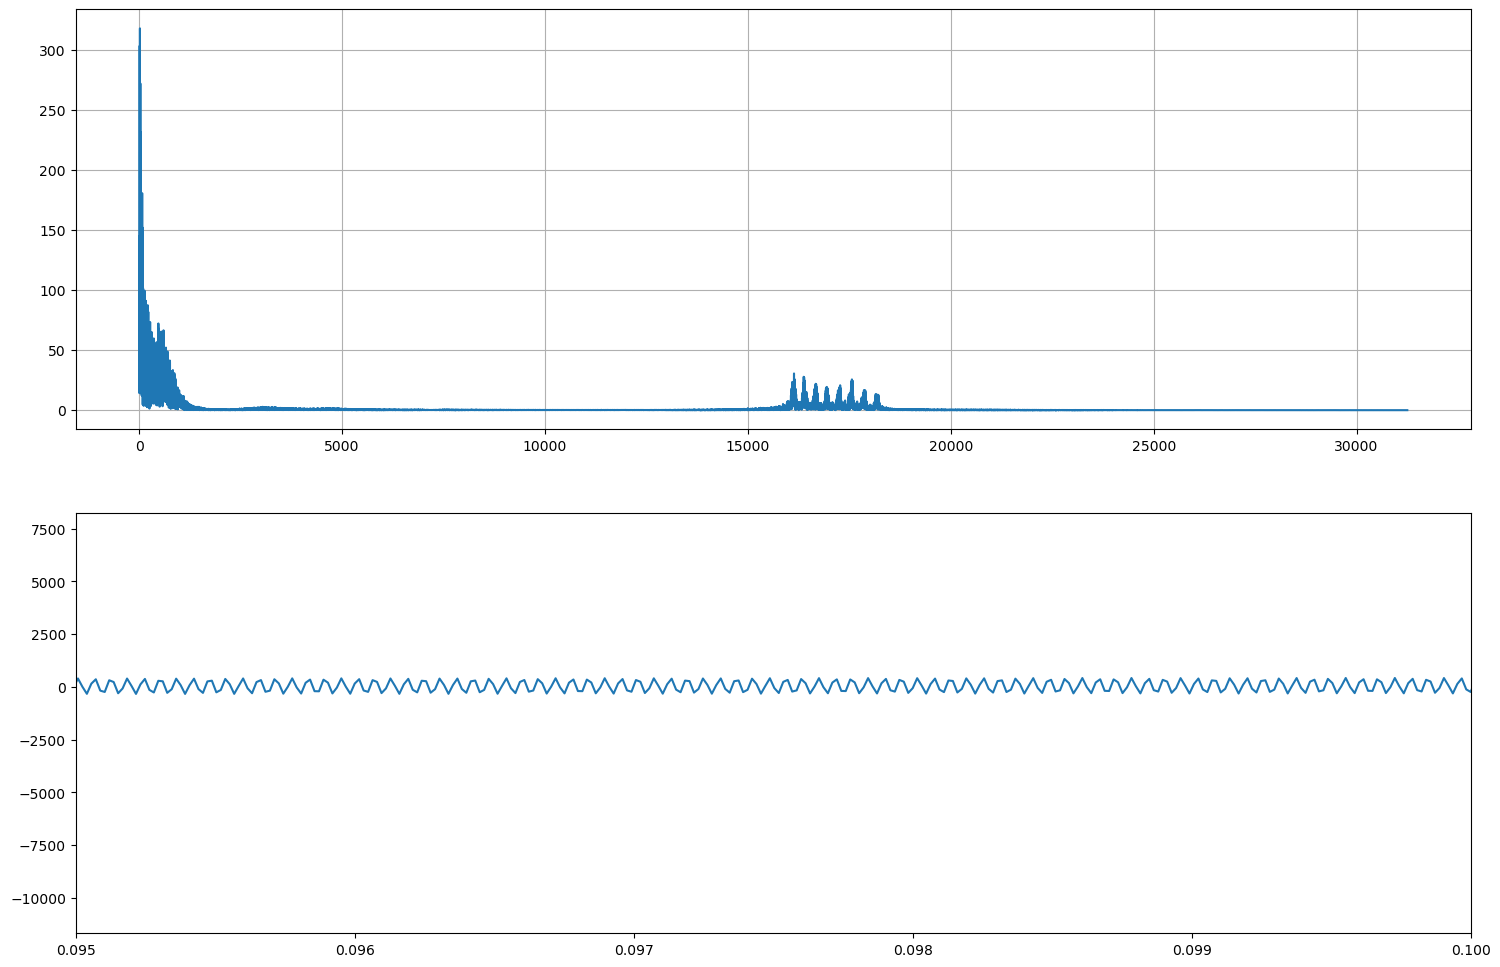

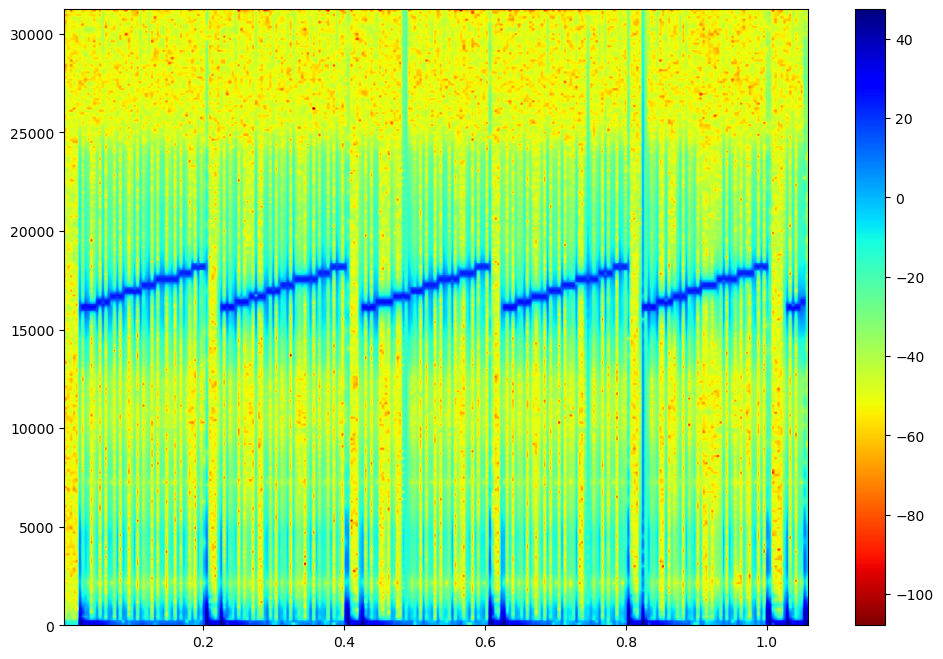

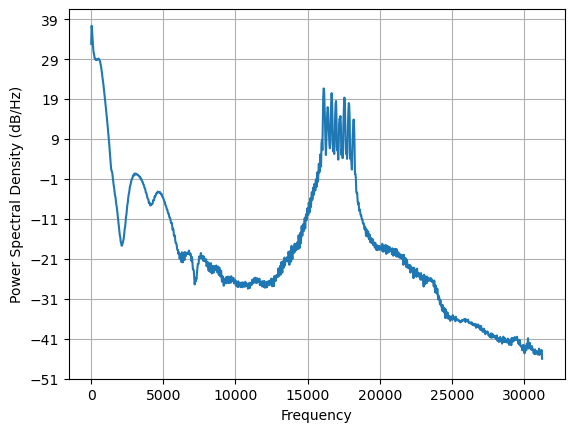

In [13]:
Clean_space = "16KHz-18KHz\Clean Space\Measurement_2.csv"
str_filename = "data\Measurement_2.csv" 

df_0 = pd.read_csv(Clean_space)
df = pd.read_csv(str_filename)

fs = 62500.0
T = 1/fs
N= df.shape[0]
y = np.array(df.Audio)
t = np.arange(0,N)*T

#y = butter_bandpass_filter(y,10000,16000,fs,order=9)

yf = fft(y)
xf = fftfreq(N, T)[:N//2]


plt.figure(figsize=(18,12))
plt.subplot(211)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.xlim((17300,20000))
plt.grid()

plt.subplot(212)
plt.plot(t, y)
plt.xlim((0.095,0.1))
#plt.ylim((-500,500))
plt.show()



plt.figure(figsize=(12,8))
plt.specgram(y,NFFT=512,Fs=fs,noverlap=256,cmap="jet_r")
plt.colorbar()
plt.show()

plt.psd(y,NFFT=2048,Fs=fs)
plt.show()

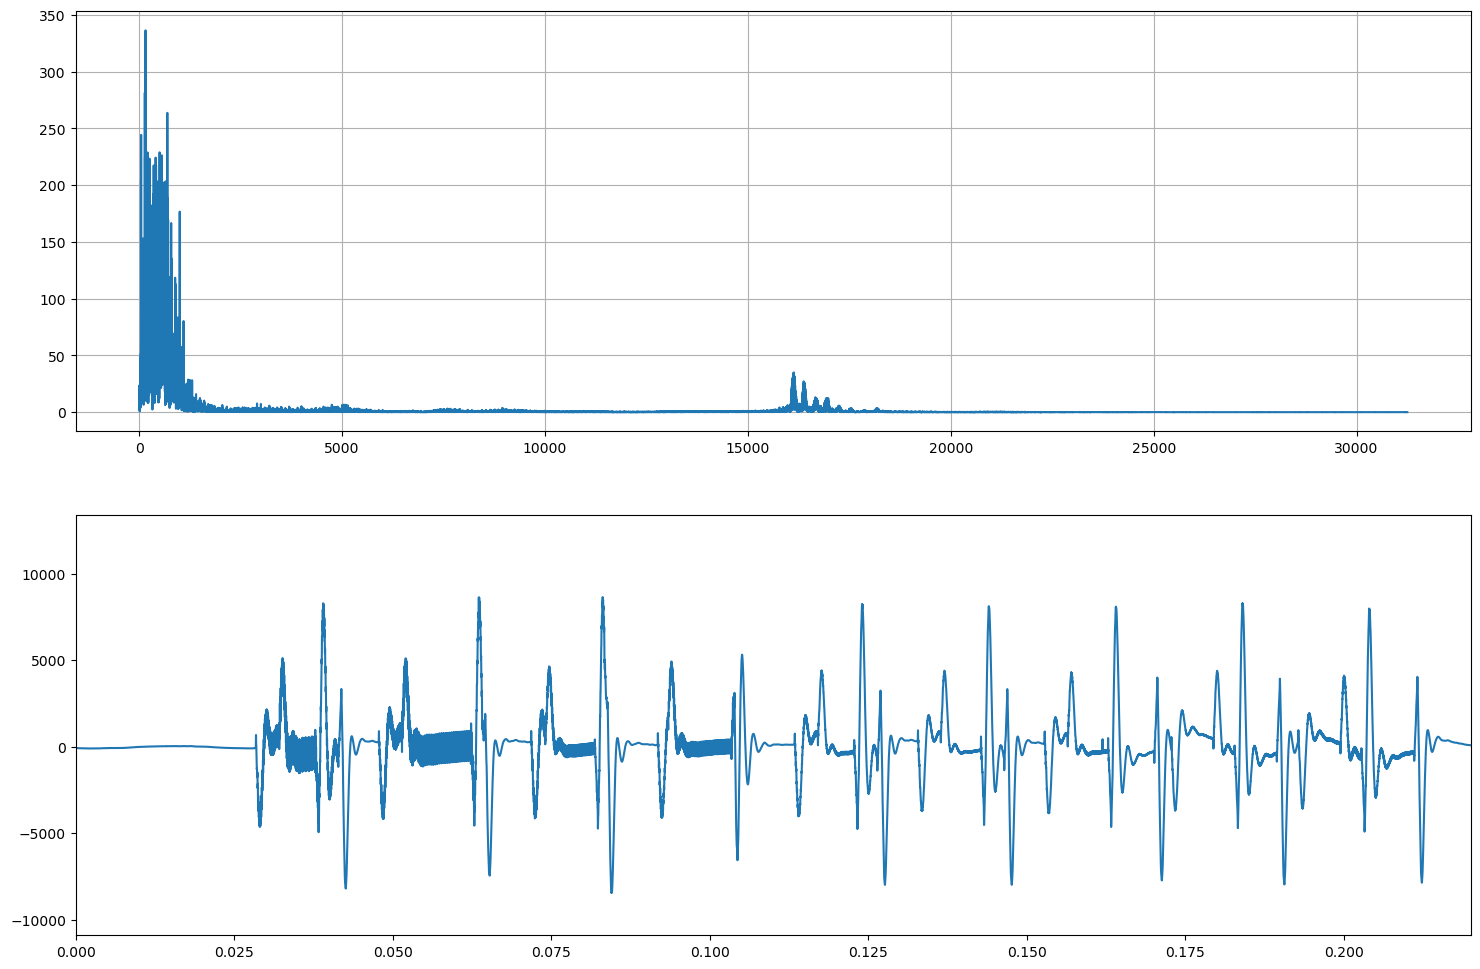

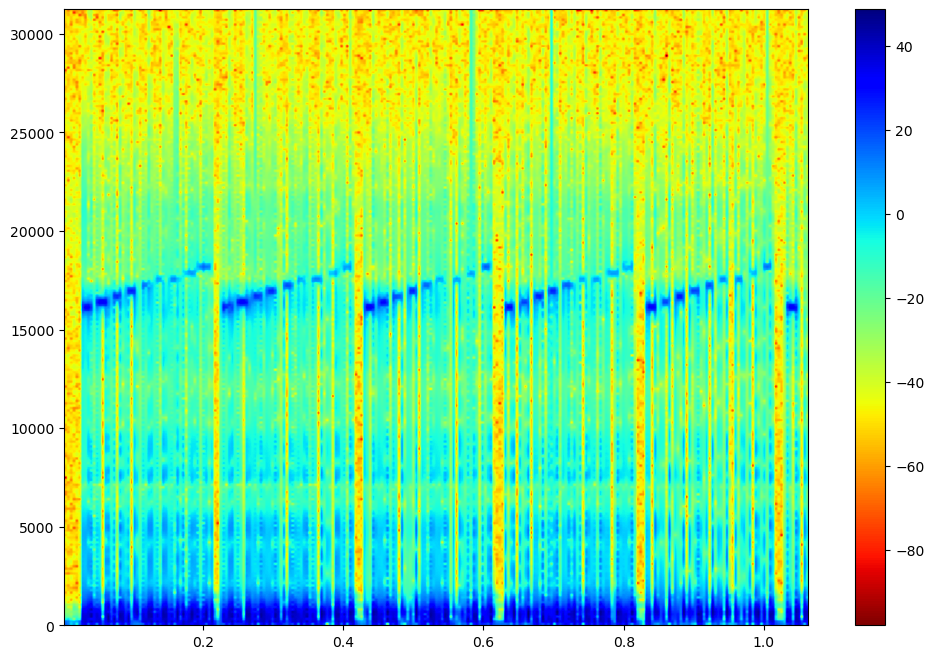

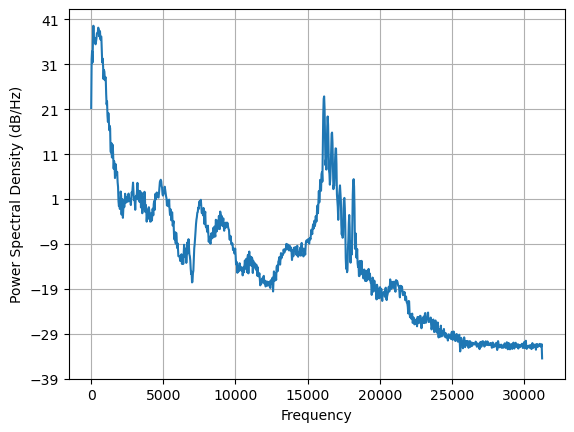

In [14]:
Clean_space = "16KHz-18KHz\Clean Space\Measurement_2.csv"
str_filename = "16KHz-18KHz\Relax State\Measurement_2.csv" 

df_0 = pd.read_csv(Clean_space)
df = pd.read_csv(str_filename)

fs = 62500.0
T = 1/fs
N= df.shape[0]
y = np.array(df.Audio) - np.array(df_0.Audio)
t = np.arange(0,N)*T

#y = butter_bandpass_filter(y,10000,16000,fs,order=9)

yf = fft(y)
xf = fftfreq(N, T)[:N//2]


plt.figure(figsize=(18,12))
plt.subplot(211)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.xlim((17300,20000))
plt.grid()

plt.subplot(212)
plt.plot(t, y)
plt.xlim((0.0,0.22))
#plt.ylim((-500,500))
plt.show()



plt.figure(figsize=(12,8))
plt.specgram(y,NFFT=512,Fs=fs,noverlap=256,cmap="jet_r")
plt.colorbar()
plt.show()

plt.psd(y,NFFT=2048,Fs=fs)
plt.show()

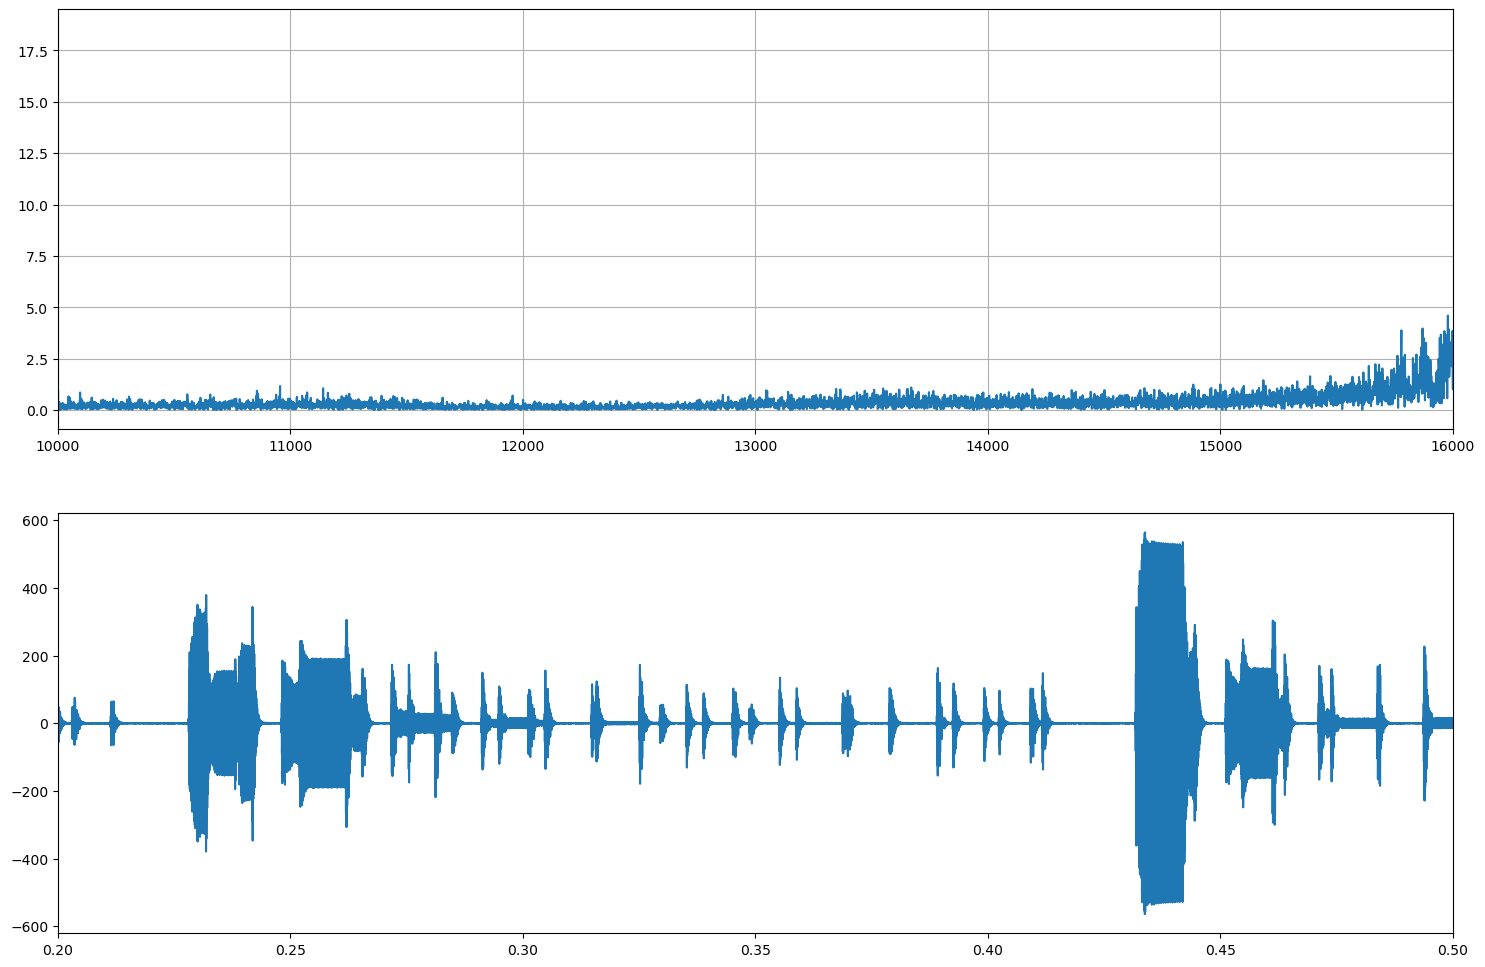

In [15]:
fs = 62500.0
lowcut = 10000.0
highcut = 16000.0

# Plot the frequency response for a few different orders.

b, a = butter_bandpass(lowcut, highcut, fs, order=8)
w, h = signal.freqz(b, a, worN=30000)

y_filtered_sound = butter_bandpass_filter(y, lowcut, highcut, fs, order=12)

yf_filtered = fft(y_filtered_sound)
xf_filtered = fftfreq(N, T)[:N//2]


plt.figure(figsize=(18,12))
plt.subplot(211)
plt.plot(xf_filtered, 2.0/N * np.abs(yf_filtered[0:N//2]))
plt.xlim((10000,16000))
plt.grid()

plt.subplot(212)
plt.plot(t, y_filtered_sound)
plt.xlim((0.2,0.5))
#plt.ylim((-500,500))
plt.show()



66560


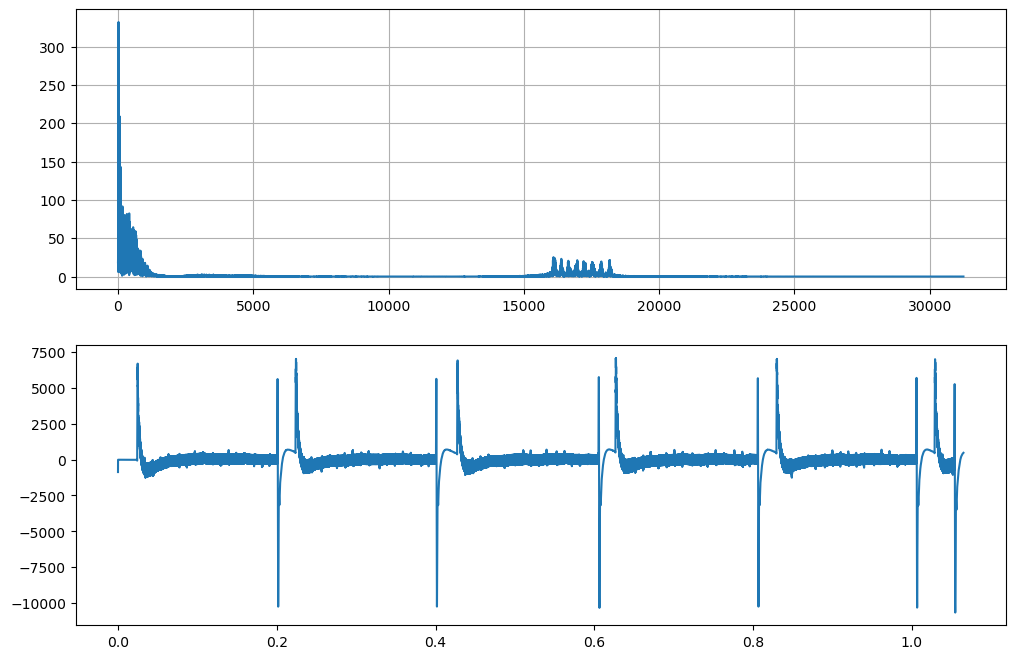

66560


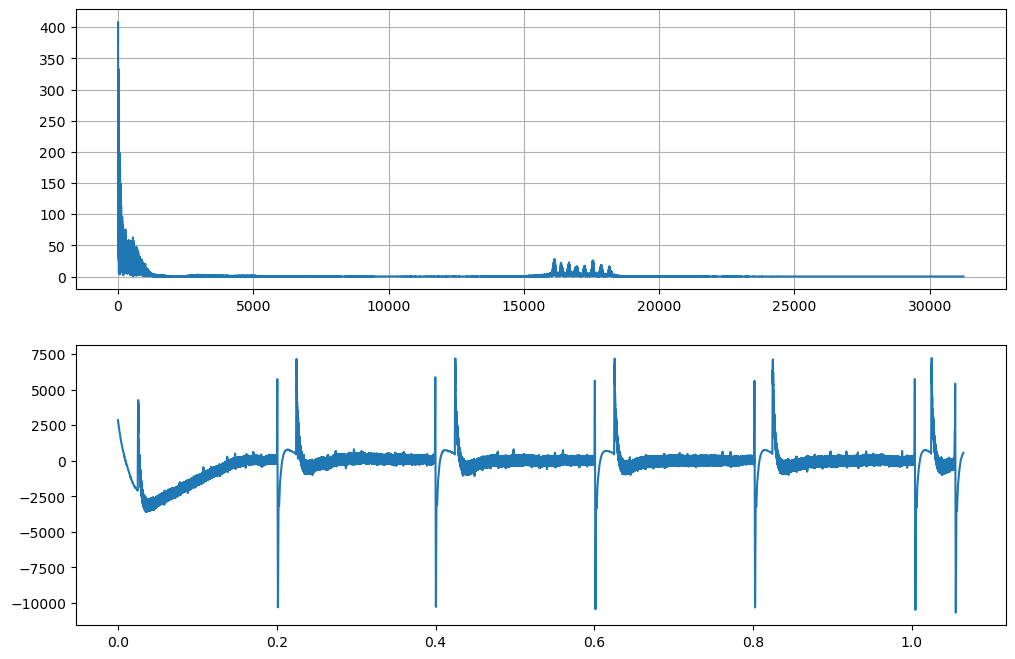

66440


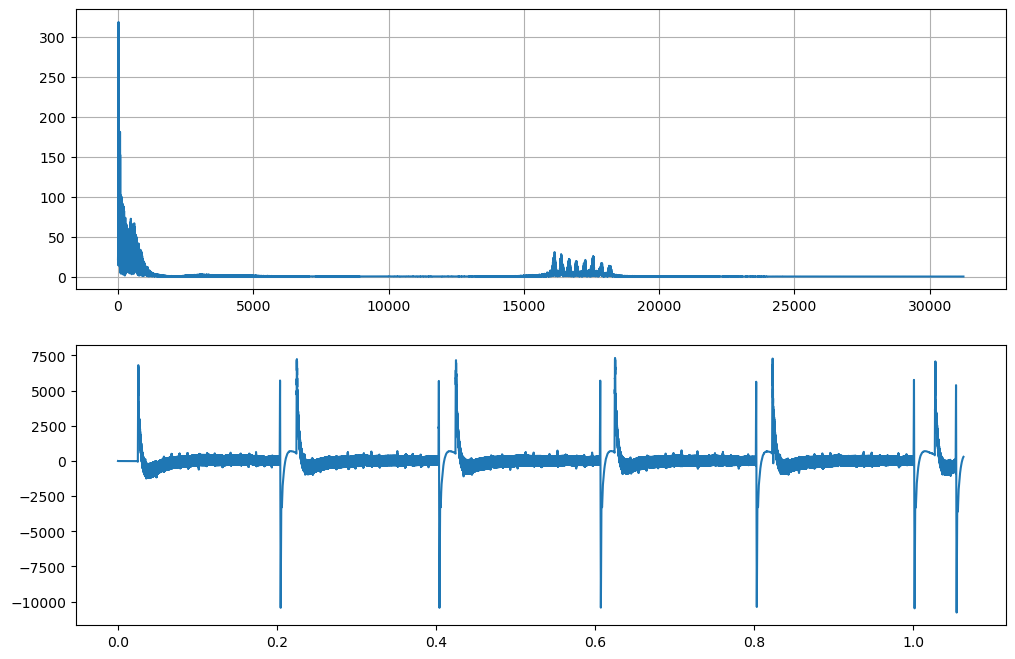

66560


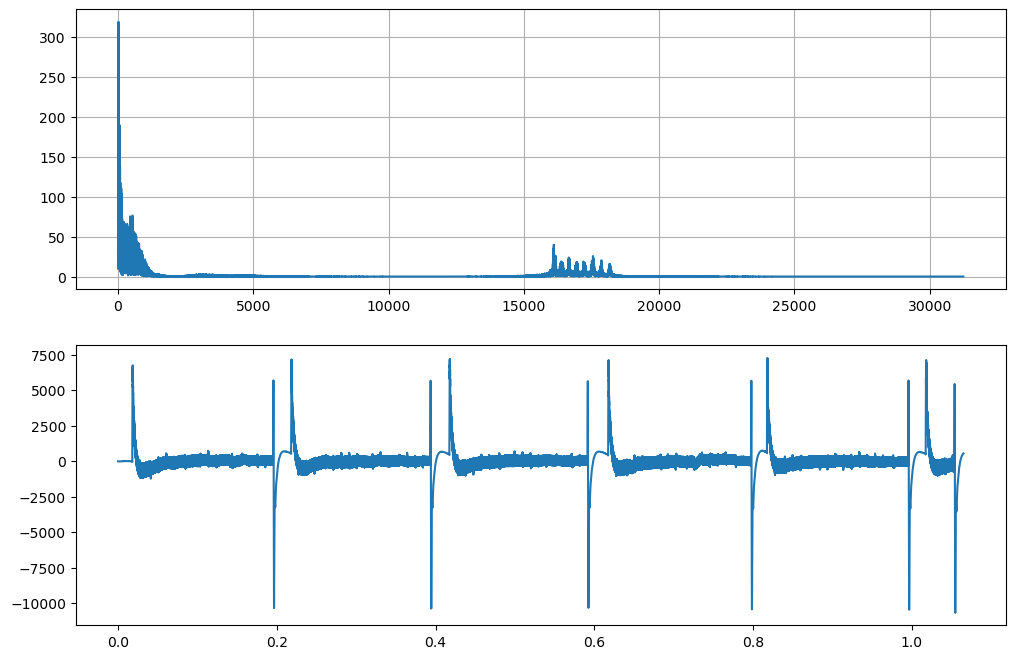

66560


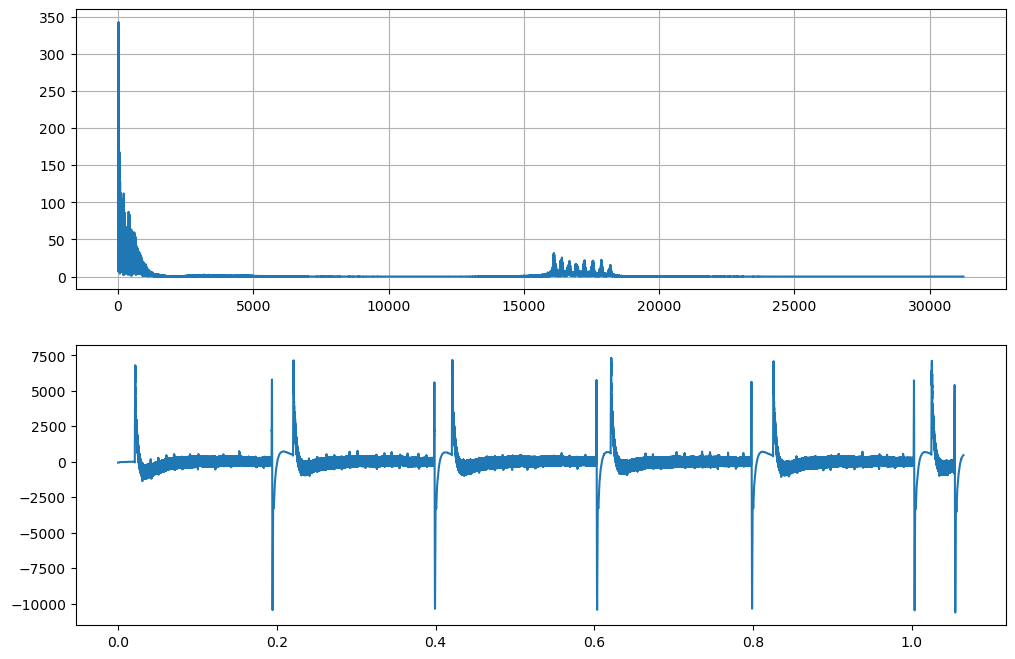

In [16]:
files = ["data\Measurement_0.csv","data\Measurement_1.csv","data\Measurement_2.csv","data\Measurement_3.csv",
         "data\Measurement_4.csv","data\Measurement_5.csv","data\Measurement_6.csv","data\Measurement_7.csv"]

for str_filename in range(0,5):
    
    df = pd.read_csv(files[str_filename])

    T = 1/(62500)
    N= df.shape[0]
    t = np.arange(0,N)*T
    y = np.array(df.Audio)

    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]

    print(N)
    plt.figure(figsize=(12,8))
    plt.subplot(211)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    #plt.xlim((15500,18500))
    plt.grid()

    plt.subplot(212)
    plt.plot(t, y)
    #plt.xlim((0.2,0.36))
    #plt.ylim((-500,500))
    plt.show()
